In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bamboolib as bam

df = pd.read_csv("/Users/rohitsoni/Downloads/bike_crash.csv")

In [2]:
df['$1000 Damage to Any One Person\'s Property'] = df['$1000 Damage to Any One Person\'s Property'].map({'No': 0, 'Yes': 1})

In [3]:
print(df['Crash Severity'].unique())

['Incapacitating Injury' 'Non-Incapacitating Injury' 'Possible Injury'
 'Not Injured' 'Killed']


In [4]:
severity_mapping = {
    'Not Injured': 0,                      # Low severity
    'Possible Injury': 0,                  # Medium severity
    'Non-Incapacitating Injury': 0,        # Medium severity
    'Incapacitating Injury': 1,            # High severity
    'Killed': 1                            # Highest severity
}

# Apply the mapping to the 'Crash Severity' column
df['Crash Severity'] = df['Crash Severity'].map(severity_mapping)

# Optional: Check the transformation has been applied correctly
print(df['Crash Severity'].value_counts())


0    2193
1     270
Name: Crash Severity, dtype: int64


In [5]:
df['target'] = -1  # Default value for when both columns have value 0
df.loc[(df['$1000 Damage to Any One Person\'s Property'] == 1) & (df['Crash Severity'] == 1), 'target'] = 1
df.loc[(df['$1000 Damage to Any One Person\'s Property'] == 0) & (df['Crash Severity'] == 0), 'target'] = 0


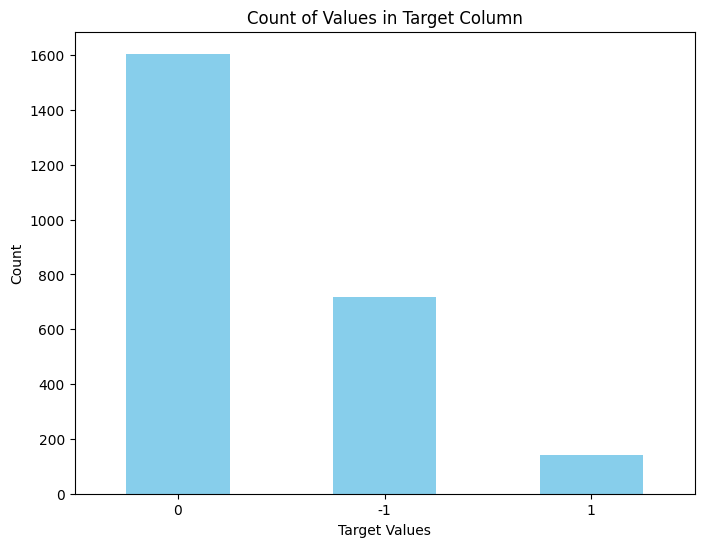

In [6]:
target_counts = df['target'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Values in Target Column')
plt.xlabel('Target Values')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [7]:
# Convert 'Crash Time' to strings
df['Crash Time'] = df['Crash Time'].astype(str)

# Pad the strings with leading zeros to ensure they are 4 characters long
df['Crash Time'] = df['Crash Time'].apply(lambda x: x.zfill(4))

# Now, convert the formatted strings to datetime.time objects
df['Crash Time'] = pd.to_datetime(df['Crash Time'], format='%H%M').dt.time

# Check the first few entries to verify the conversion
print(df['Crash Time'].head())


0    02:39:00
1    03:10:00
2    03:10:00
3    03:10:00
4    23:00:00
Name: Crash Time, dtype: object


In [8]:
# Define a function to categorize and convert crash times to numerical codes directly
def categorize_and_convert_crash_time(time_obj):
    if pd.isnull(time_obj):
        return 5  # 'Unknown'
    hours = time_obj.hour
    if 6 <= hours < 9:
        return 0  # 'Morning Rush Hour'
    elif 9 <= hours < 15:
        return 1  # 'Midday'
    elif 15 <= hours < 19:
        return 2  # 'Afternoon Rush Hour'
    elif 19 <= hours <= 23:
        return 3  # 'Evening'
    else:
        return 4  # 'Late Night to Early Morning'

# Assuming 'Crash Time' is already a datetime.time column
df['Crash Time Category'] = df['Crash Time'].apply(categorize_and_convert_crash_time)

# Mapping for reference
category_to_numerical = {
    'Morning Rush Hour': 0,
    'Midday': 1,
    'Afternoon Rush Hour': 2,
    'Evening': 3,
    'Late Night to Early Morning': 4,
    'Unknown': 5
}

# Print the mapping for reference
print("Category to Numerical Mapping:")
for category, numerical in category_to_numerical.items():
    print(f"'{category}': {numerical}")

# Optional: Verify the conversion by viewing the first few entries
print(df['Crash Time Category'].head())


Category to Numerical Mapping:
'Morning Rush Hour': 0
'Midday': 1
'Afternoon Rush Hour': 2
'Evening': 3
'Late Night to Early Morning': 4
'Unknown': 5
0    4
1    4
2    4
3    4
4    3
Name: Crash Time Category, dtype: int64


In [9]:
# Function to categorize speed limits
def categorize_speed_limit(speed):
    if -1 <= speed <= 0:
        return 0  # Stop
    elif 1 <= speed <= 20:
        return 1  # Slow
    elif 21 <= speed <= 40:
        return 2  # Medium
    else:
        return 3  # High

# Apply the function to the 'Speed Limit' column to create a new 'Speed Category' column
df['Speed Category'] = df['Speed Limit'].apply(categorize_speed_limit)

# Mapping for reference
category_to_numerical_speed = {
    'Stop': 0,
    'Slow Speed': 1,
    'Medium Speed': 2,
    'High Speed': 3,
    'Unknown': 4
}

# Print the mapping for reference
print("Category to Numerical Mapping:")
for category, numerical in category_to_numerical_speed.items():
    print(f"'{category}': {numerical}")

# Optional: Verify the conversion by viewing the first few entries
print(df['Speed Category'].head())


Category to Numerical Mapping:
'Stop': 0
'Slow Speed': 1
'Medium Speed': 2
'High Speed': 3
'Unknown': 4
0    3
1    2
2    2
3    2
4    3
Name: Speed Category, dtype: int64


In [10]:
#df.rename(columns={'$1000 Damage to Any One Person\'s Property': 'Damage to Property'}, inplace=True)
# Identify categorical columns (You might need to adjust this list based on your dataset)
categorical_columns = ['$1000 Damage to Any One Person\'s Property','Active School Zone Flag','At Intersection Flag','Construction Zone Flag',  'Day of Week','Intersection Related', 'Roadway Part', 'Person Helmet', 'Surface Condition','Traffic Control Type', 'Crash Time Category','Speed Category']

# Initialize LabelEncoders and apply them to each categorical column
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Print out mappings for each categorical variable
for col, le in label_encoders.items():
    mappings = {index: label for index, label in enumerate(le.classes_)}
    print(f'Mappings for {col}: {mappings}\n')


Mappings for $1000 Damage to Any One Person's Property: {0: 0, 1: 1}

Mappings for Active School Zone Flag: {0: 'No', 1: 'Yes'}

Mappings for At Intersection Flag: {0: False, 1: True}

Mappings for Construction Zone Flag: {0: 'No', 1: 'Yes'}

Mappings for Day of Week: {0: 'Friday', 1: 'Monday', 2: 'Saturday', 3: 'Sunday', 4: 'Thursday', 5: 'Tuesday', 6: 'Wednesday'}

Mappings for Intersection Related: {0: 'Driveway Access', 1: 'Intersection', 2: 'Intersection Related', 3: 'Non Intersection', 4: 'Not Reported'}

Mappings for Roadway Part: {0: 'Entrance/On Ramp', 1: 'Main/Proper Lane', 2: 'Other (Explain In Narrative)', 3: 'Service/Frontage Road'}

Mappings for Person Helmet: {0: 'Not Worn', 1: 'Unknown If Worn', 2: 'Worn, Damaged', 3: 'Worn, Not Damaged', 4: 'Worn, Unk Damage'}

Mappings for Surface Condition: {0: 'Dry', 1: 'Ice', 2: 'Other (Explain In Narrative)', 3: 'Sand, Mud, Dirt', 4: 'Standing Water', 5: 'Unknown', 6: 'Wet'}

Mappings for Traffic Control Type: {0: 'Bike Lane', 1: 

In [11]:
print(df.columns)

Index(['$1000 Damage to Any One Person's Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Average Daily Traffic Amount',
       'Construction Zone Flag', 'Crash Severity', 'Crash Time',
       'Crash Total Injury Count', 'Crash Year', 'Day of Week',
       'Intersection Related', 'Roadway Part', 'Speed Limit',
       'Surface Condition', 'Traffic Control Type', 'Person Helmet', 'target',
       'Crash Time Category', 'Speed Category'],
      dtype='object')


In [12]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from joblib import dump

# Assuming df is your DataFrame

selected =['Day of Week',
        'Active School Zone Flag',
        'Speed Category',
        'Crash Time Category',
        'Surface Condition',
        'Person Helmet',
        'Intersection Related',
        'Construction Zone Flag',
        'Roadway Part',
        'Traffic Control Type']

X= df[selected]

y = df['target']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline with imputation, StandardScaler, PolynomialFeatures, and LogisticRegressionCV
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('logistic', LogisticRegressionCV(cv=5, penalty='l1', solver='saga', max_iter=500, random_state=42, scoring='accuracy'))
])

# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train)

# Using the pipeline to predict
y_pred_l1 = pipeline.predict(X_test)

# Evaluation
print("L1 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_l1))
print(classification_report(y_test, y_pred_l1))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_l1)
print("Confusion Matrix for L1 Logistic Regression:\n", conf_matrix)

# Saving the pipeline
dump(pipeline, 'logistic_regression_pipeline.joblib')


L1 Logistic Regression Accuracy: 0.6795131845841785
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       133
           0       0.68      1.00      0.81       335
           1       0.00      0.00      0.00        25

    accuracy                           0.68       493
   macro avg       0.23      0.33      0.27       493
weighted avg       0.46      0.68      0.55       493

Confusion Matrix for L1 Logistic Regression:
 [[  0 133   0]
 [  0 335   0]
 [  0  25   0]]


['logistic_regression_pipeline.joblib']

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from joblib import dump

# Load the dataset

# Perform feature engineering

# Label Encoding for categorical variables
label_encoders = {}
categorical_columns = ['$1000 Damage to Any One Person\'s Property','Active School Zone Flag','At Intersection Flag','Construction Zone Flag',  'Day of Week','Intersection Related', 'Roadway Part', 'Person Helmet', 'Surface Condition','Traffic Control Type']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
selected_features = ['Day of Week', 'Active School Zone Flag','Surface Condition', 'Person Helmet', 'Intersection Related', 'Construction Zone Flag', 'Roadway Part', 'Traffic Control Type']
X = df[selected_features]
y = df['target']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))

# Save the trained model
dump(rf_model, 'random_forest_model.joblib')


Random Forest Accuracy: 0.6064908722109533
              precision    recall  f1-score   support

          -1       0.30      0.19      0.23       133
           0       0.69      0.81      0.74       335
           1       0.25      0.16      0.20        25

    accuracy                           0.61       493
   macro avg       0.41      0.38      0.39       493
weighted avg       0.56      0.61      0.58       493

Confusion Matrix for Random Forest:
 [[ 25 104   4]
 [ 57 270   8]
 [  1  20   4]]


['random_forest_model.joblib']